In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
    Conv2D(30, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(60, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 199s 105ms/step - loss: 0.4224 - accuracy: 0.9546 - val_loss: 0.0797 - val_accuracy: 0.9747
Epoch 2/4
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0676 - val_accuracy: 0.9807
Epoch 3/4
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0760 - val_accuracy: 0.9801
Epoch 4/4
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0691 - val_accuracy: 0.9801


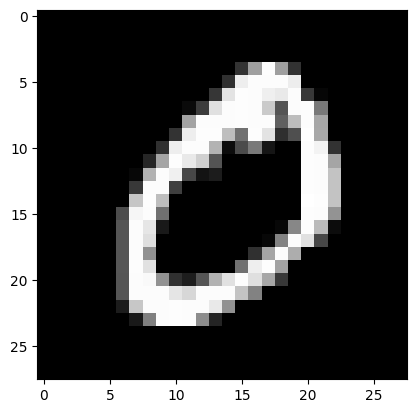

1/1 [==============================] - 0s 179ms/step


Prediction: 0


In [9]:
example = X_train[1]
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
prediction = model.predict(example.reshape(1,28,28,1))
print("\n\nPrediction: {}".format(np.argmax(prediction)))

Preprocessing and extracting digits from test image:

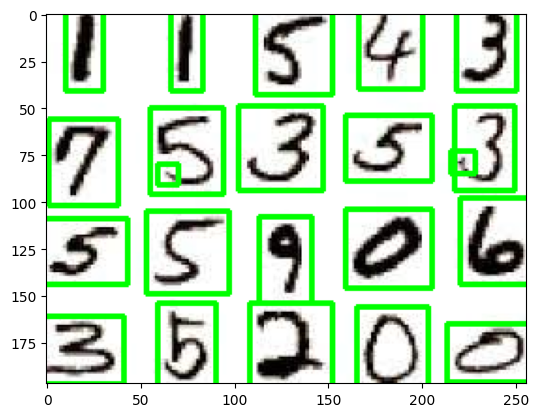

In [11]:
image = cv2.imread('/content/download2.jpg')
grey_img = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(grey_img.copy(), 95, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thr.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed = []
for c in contours:
    padding = 5
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x-padding, y-padding), (x+w+padding, y+h+padding), color=(0, 255, 0), thickness=2)
    digit = thr[y:y+h, x:x+w]#cropping digit
    resized = cv2.resize(digit, (22,22))
    padded = np.pad(resized, ((3,3),(3,3)), "constant", constant_values=0)
    preprocessed.append(padded)

plt.imshow(image, cmap="gray")
plt.show()

Making predictions

1/1 [==============================] - 0s 24ms/step


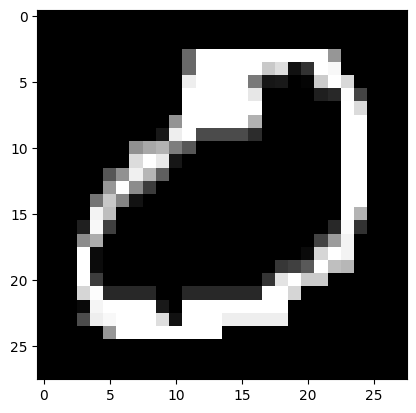

Prediction: 0
1/1 [==============================] - 0s 26ms/step


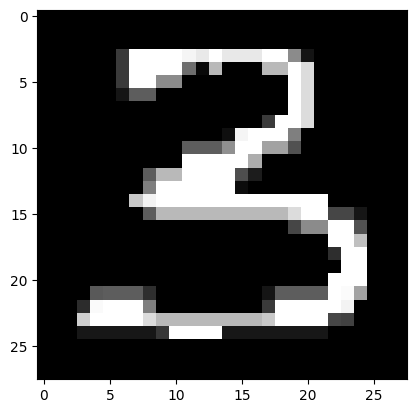

Prediction: 3
1/1 [==============================] - 0s 27ms/step


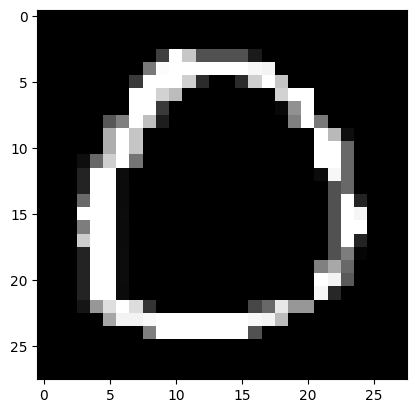

Prediction: 0
1/1 [==============================] - 0s 24ms/step


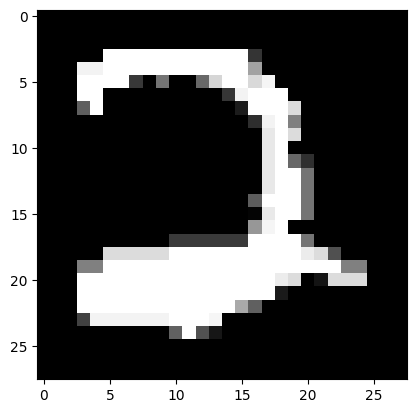

Prediction: 2
1/1 [==============================] - 0s 25ms/step


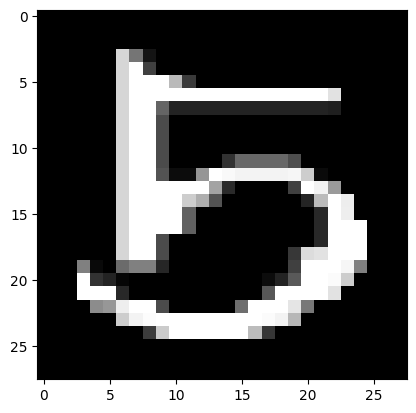

Prediction: 5
1/1 [==============================] - 0s 23ms/step


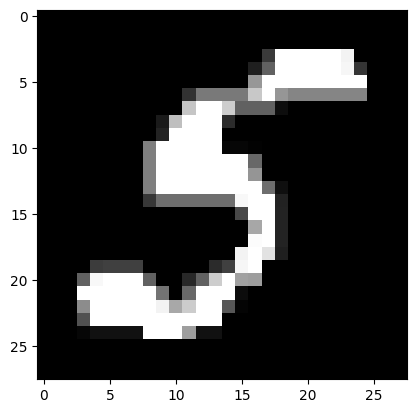

Prediction: 5
1/1 [==============================] - 0s 22ms/step


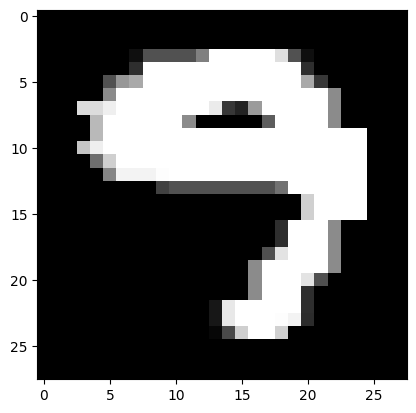

Prediction: 2
1/1 [==============================] - 0s 24ms/step


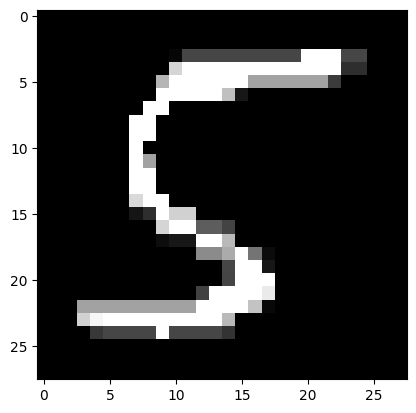

Prediction: 5
1/1 [==============================] - 0s 25ms/step


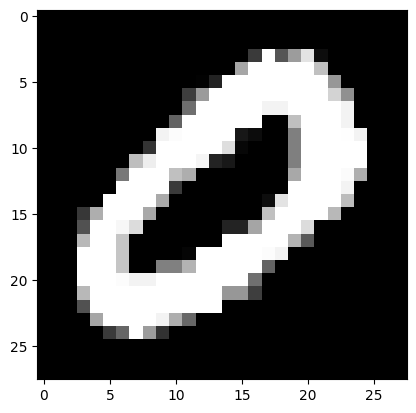

Prediction: 0
1/1 [==============================] - 0s 23ms/step


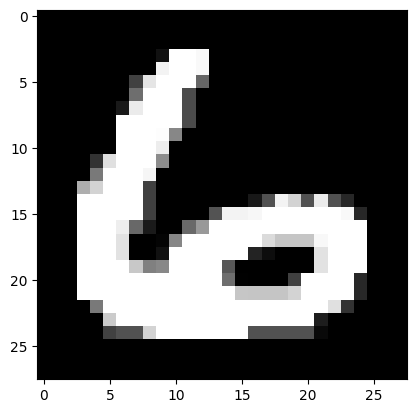

Prediction: 6
1/1 [==============================] - 0s 22ms/step


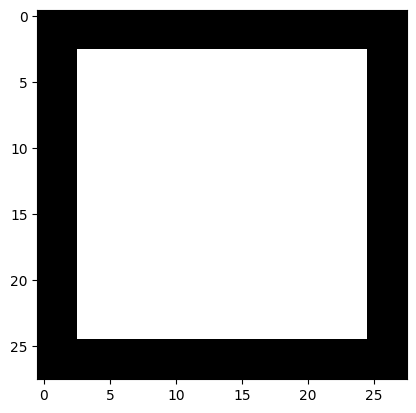

Prediction: 5
1/1 [==============================] - 0s 25ms/step


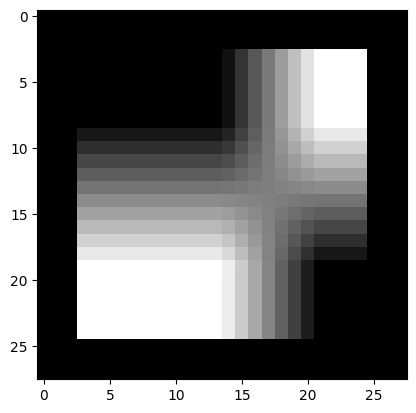

Prediction: 3
1/1 [==============================] - 0s 22ms/step


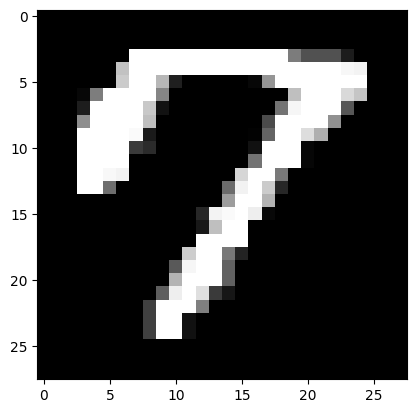

Prediction: 1
1/1 [==============================] - 0s 23ms/step


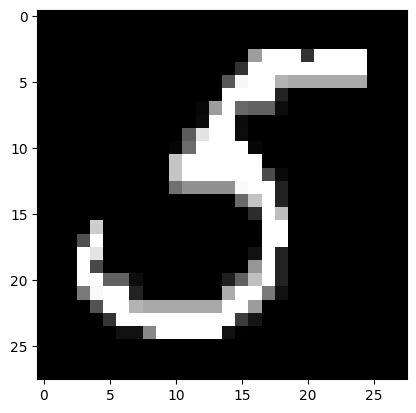

Prediction: 5
1/1 [==============================] - 0s 28ms/step


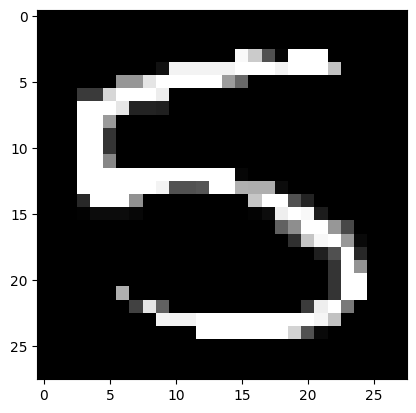

Prediction: 5
1/1 [==============================] - 0s 23ms/step


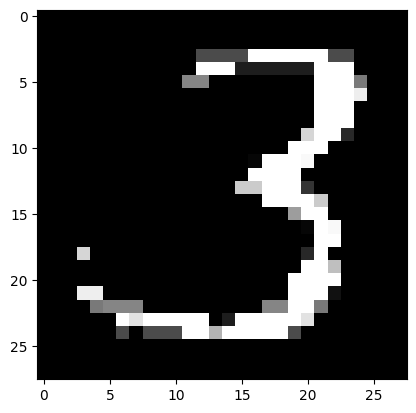

Prediction: 3
1/1 [==============================] - 0s 28ms/step


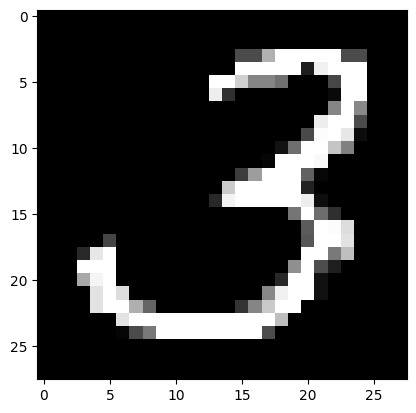

Prediction: 3
1/1 [==============================] - 0s 22ms/step


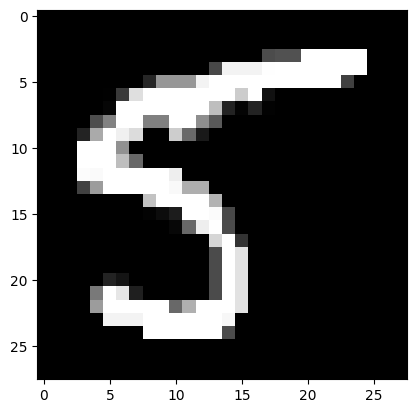

Prediction: 5
1/1 [==============================] - 0s 36ms/step


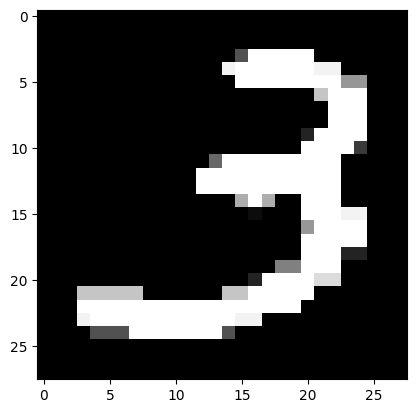

Prediction: 3
1/1 [==============================] - 0s 25ms/step


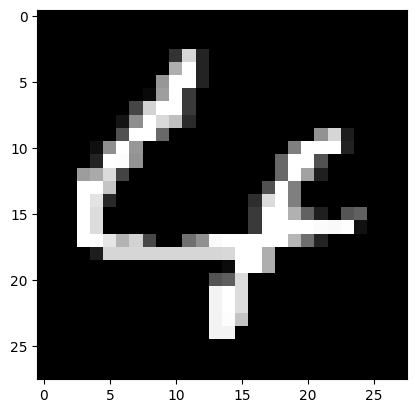

Prediction: 4
1/1 [==============================] - 0s 27ms/step


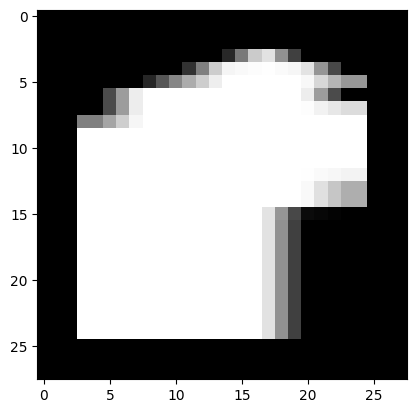

Prediction: 2
1/1 [==============================] - 0s 25ms/step


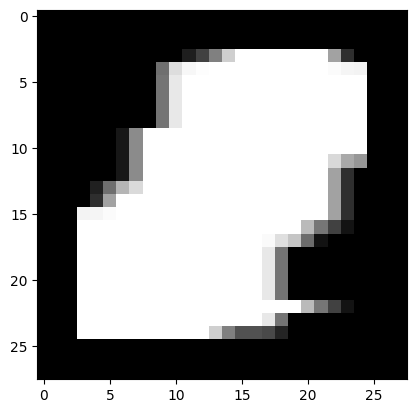

Prediction: 4


In [12]:
predlist = []
for digit in preprocessed:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))
    predlist.append(np.argmax(prediction))
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Prediction: {}".format(np.argmax(prediction)))

In [13]:
for i in predlist:
    print(i)

0
3
0
2
5
5
2
5
0
6
5
3
1
5
5
3
3
5
3
4
2
4
